In [130]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, roc_curve, precision_score,\
    classification_report, auc, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from imblearn.metrics import geometric_mean_score
import data_cleaning as dc
from sklearn.metrics import classification_report
import importlib

In [131]:
np.seterr(divide='ignore', invalid='ignore')

{'divide': 'ignore', 'over': 'warn', 'under': 'ignore', 'invalid': 'ignore'}

In [132]:
importlib.reload(dc)
split_size = 0.2
balanced = False
show_number_of_data=True
X_train, X_test, y_train, y_test = dc.choose_data(balanced, split_size,show_number_of_data)

Train data: 67199
Test data: 16800


In [133]:
model = KNeighborsClassifier(n_neighbors=3, metric='manhattan')

model.fit(X_train, y_train)

KNeighborsClassifier(metric='manhattan', n_neighbors=3)

In [137]:
y_pred = model.predict(X_test)
fpr_org, tpr_org, _ = roc_curve(y_test, y_pred)
cm=confusion_matrix(y_test, y_pred)

print('ACC-org :', round(accuracy_score(y_test, y_pred), 3))
print('AUC-org :', round(auc(fpr_org, tpr_org), 3))
print('G-mean-org :', round(geometric_mean_score(y_test, y_pred.ravel()), 3))
print('F1-org :', round(f1_score(y_test, y_pred), 3))
print('Sens-org :', round(cm[1,1]/(cm[1,0]+cm[1,1]), 3))
print('Spec-org :', round(cm[0,0]/(cm[0,0]+cm[0,1]), 3))
print('Prec-org :', round(precision_score(y_test, y_pred), 3))
print('\nConfusion matrix\n', confusion_matrix(y_test, y_pred))


ACC-org : 0.838
AUC-org : 0.664
G-mean-org : 0.606
F1-org : 0.465
Sens-org : 0.392
Spec-org : 0.936
Prec-org : 0.573

Confusion matrix
 [[12893   882]
 [ 1840  1185]]


In [138]:
print('Report: ', classification_report(y_test, y_pred))

Report:                precision    recall  f1-score   support

           0       0.88      0.94      0.90     13775
           1       0.57      0.39      0.47      3025

    accuracy                           0.84     16800
   macro avg       0.72      0.66      0.68     16800
weighted avg       0.82      0.84      0.83     16800



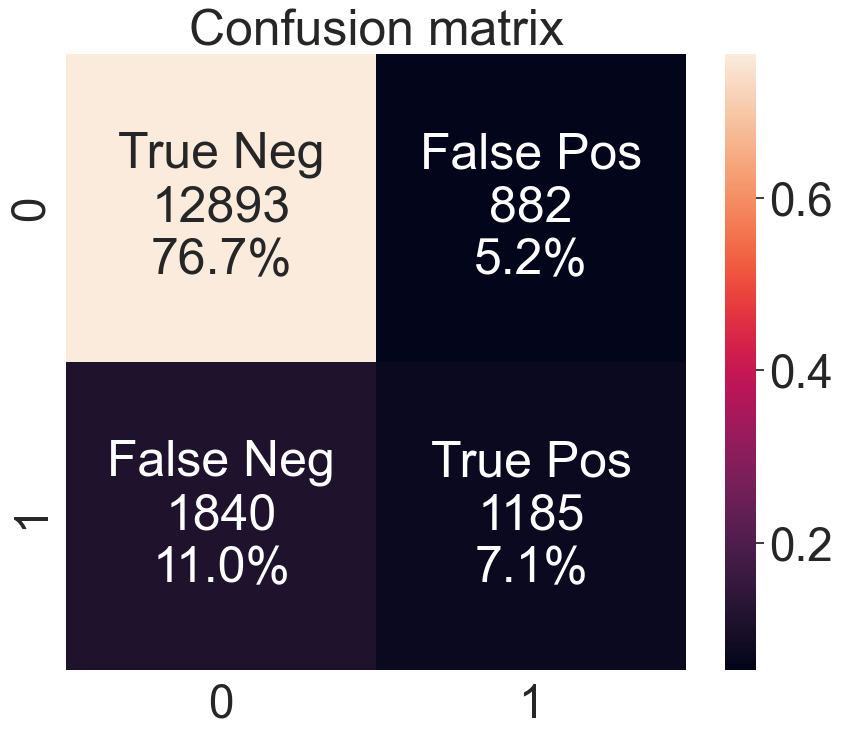

In [136]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
group_percentages = ["{0:.1%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

labels = np.asarray(labels).reshape(2,2)

plt.rcParams["figure.figsize"] = (10,8)
ax = sns.heatmap(cm/np.sum(cm), annot=labels,
            fmt='')
sns.set(font_scale=3)
ax.set_title('Confusion matrix')
plt.show()